_PyCaret’s Anomaly Detection Module is an unsupervised machine learning module that is used for identifying rare items, events, or observations that raise suspicions by differing significantly from the majority of the data.
Typically, the anomalous items will translate to some kind of problems such as bank fraud, a structural defect, medical problems, or errors._




*Install PyCaret with Python's pip package manager*

In [1]:
!pip install pycaret
import pycaret

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.4/60.4 kB 3.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 165.8/165.8 kB 11.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Using cached jedi-0.19.1-py2.py3-none-any.whl.metadata (22 kB)
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.4/50.4 kB 2.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 486.1/486.1 kB 20.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 106.8/106.8 kB 9.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.8/21.8 MB 83.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.9/81.9 kB 7.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 302.2/302.2 kB 25.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.9/79.9 MB 23.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 80.7/80.7 kB 5.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 75.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━

In [2]:
import pycaret
pycaret.__version__

'3.3.2'

*Loading sample dataset from pycaret dataset module*

In [4]:
from pycaret.datasets import get_data
data = get_data('boston')

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


**Setup** : *This function initializes the training environment and creates the transformation pipeline. The setup function must be called before executing any other function.*

In [5]:
from pycaret.anomaly import *
s = setup(data, session_id = 123)

,Description,Value
0,Session id,123
1,Original data shape,"(506, 14)"
2,Transformed data shape,"(506, 14)"
3,Numeric features,14
4,Preprocess,True
5,Imputation type,simple
6,Numeric imputation,mean
7,Categorical imputation,mode
8,CPU Jobs,-1
9,Use GPU,False


*Import AnomalyExperiment and init the class*


In [6]:
from pycaret.anomaly import AnomalyExperiment
exp = AnomalyExperiment()

*Check type of exp*

In [7]:
type(exp)

pycaret.anomaly.oop.AnomalyExperiment

*Init setup on exp*

In [8]:
exp.setup(data, session_id = 123)


,Description,Value
0,Session id,123
1,Original data shape,"(506, 14)"
2,Transformed data shape,"(506, 14)"
3,Numeric features,14
4,Preprocess,True
5,Imputation type,simple
6,Numeric imputation,mean
7,Categorical imputation,mode
8,CPU Jobs,-1
9,Use GPU,False


**Create model**: *This function trains an unsupervised anomaly detection model. All the available models can be accessed using the models function.*

*Train iforest model*

In [9]:
iforest = create_model('iforest')
iforest

Processing:   0%|          | 0/3 [00:00<?, ?it/s]

IForest(behaviour='new', bootstrap=False, contamination=0.05,
    max_features=1.0, max_samples='auto', n_estimators=100, n_jobs=-1,
    random_state=123, verbose=0)

*Check all the available models*

In [10]:
models()

,Name,Reference
ID,,
abod,Angle-base Outlier Detection,pyod.models.abod.ABOD
cluster,Clustering-Based Local Outlier,pycaret.internal.patches.pyod.CBLOFForceToDouble
cof,Connectivity-Based Local Outlier,pyod.models.cof.COF
iforest,Isolation Forest,pyod.models.iforest.IForest
histogram,Histogram-based Outlier Detection,pyod.models.hbos.HBOS
knn,K-Nearest Neighbors Detector,pyod.models.knn.KNN
lof,Local Outlier Factor,pyod.models.lof.LOF
svm,One-class SVM detector,pyod.models.ocsvm.OCSVM
pca,Principal Component Analysis,pyod.models.pca.PCA


**Assign models:** *This function assigns anomaly labels to the training data, given a trained model*.


In [11]:
iforest_anomalies = assign_model(iforest)
iforest_anomalies

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv,Anomaly,Anomaly_Score
0,0.00632,18.0,2.31,0,0.538,6.575,65.199997,4.0900,1,296,15.300000,396.899994,4.98,24.000000,0,-0.110267
1,0.02731,0.0,7.07,0,0.469,6.421,78.900002,4.9671,2,242,17.799999,396.899994,9.14,21.600000,0,-0.124826
2,0.02729,0.0,7.07,0,0.469,7.185,61.099998,4.9671,2,242,17.799999,392.829987,4.03,34.700001,0,-0.095112
3,0.03237,0.0,2.18,0,0.458,6.998,45.799999,6.0622,3,222,18.700001,394.630005,2.94,33.400002,0,-0.105650
4,0.06905,0.0,2.18,0,0.458,7.147,54.200001,6.0622,3,222,18.700001,396.899994,5.33,36.200001,0,-0.107780
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0,0.573,6.593,69.099998,2.4786,1,273,21.000000,391.989990,9.67,22.400000,0,-0.123593
502,0.04527,0.0,11.93,0,0.573,6.120,76.699997,2.2875,1,273,21.000000,396.899994,9.08,20.600000,0,-0.122619
503,0.06076,0.0,11.93,0,0.573,6.976,91.000000,2.1675,1,273,21.000000,396.899994,5.64,23.900000,0,-0.084018
504,0.10959,0.0,11.93,0,0.573,6.794,89.300003,2.3889,1,273,21.000000,393.450012,6.48,22.000000,0,-0.104285


**Analyze Mode** : *You can use the plot_model function to analyzes the performance of a trained model on the test set. It may require re-training the model in certain cases.*

*tsne plot anomalies*

In [12]:
plot_model(iforest, plot = 'tsne')

*An alternate to plot_model function is evaluate_model.*

In [13]:
evaluate_model(iforest)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

**Prediction** : *The predict_model function returns Anomaly and Anomaly_Score label as a new column in the input dataframe. Some times clustering models are trained for analysis purpose only and the interest of user is only in assigned labels on the training dataset, that can be done using assign_model function. predict_model is only useful when you want to obtain cluster labels on unseen data*

*Predict on test set*

In [14]:
iforest_pred = predict_model(iforest, data=data)
iforest_pred

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv,Anomaly,Anomaly_Score
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0,0,-0.110267
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6,0,-0.124826
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7,0,-0.095112
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4,0,-0.105650
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2,0,-0.107780
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67,22.4,0,-0.123593
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08,20.6,0,-0.122619
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64,23.9,0,-0.084018
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48,22.0,0,-0.104285


**Save Model:** *Finally, you can save the entire pipeline on disk for later use, using pycaret's save_model function.*

*Save pipeline*

In [15]:
save_model(iforest, 'iforest_pipeline')

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=Memory(location=None),
          steps=[('numerical_imputer',
                  TransformerWrapper(include=['crim', 'zn', 'indus', 'chas',
                                              'nox', 'rm', 'age', 'dis', 'rad',
                                              'tax', 'ptratio', 'black', 'lstat',
                                              'medv'],
                                     transformer=SimpleImputer())),
                 ('categorical_imputer',
                  TransformerWrapper(include=[],
                                     transformer=SimpleImputer(strategy='most_frequent'))),
                 ('trained_model',
                  IForest(behaviour='new', bootstrap=False, contamination=0.05,
     max_features=1.0, max_samples='auto', n_estimators=100, n_jobs=-1,
     random_state=123, verbose=0))]),
 'iforest_pipeline.pkl')

*Load Pipeline*

In [16]:
loaded_iforest_pipeline = load_model('iforest_pipeline')
loaded_iforest_pipeline

Transformation Pipeline and Model Successfully Loaded


Pipeline(memory=FastMemory(location=/tmp/joblib),
         steps=[('numerical_imputer',
                 TransformerWrapper(include=['crim', 'zn', 'indus', 'chas',
                                             'nox', 'rm', 'age', 'dis', 'rad',
                                             'tax', 'ptratio', 'black', 'lstat',
                                             'medv'],
                                    transformer=SimpleImputer())),
                ('categorical_imputer',
                 TransformerWrapper(include=[],
                                    transformer=SimpleImputer(strategy='most_frequent'))),
                ('trained_model',
                 IForest(behaviour='new', bootstrap=False, contamination=0.05,
    max_features=1.0, max_samples='auto', n_estimators=100, n_jobs=-1,
    random_state=123, verbose=0))])

**Setup:** *This function initializes the training environment and creates the transformation pipeline. The setup function must be called before executing any other function. It takes one mandatory parameter only: data. All the other parameters are optional.*

In [17]:
s = setup(data, session_id = 123)

,Description,Value
0,Session id,123
1,Original data shape,"(506, 14)"
2,Transformed data shape,"(506, 14)"
3,Numeric features,14
4,Preprocess,True
5,Imputation type,simple
6,Numeric imputation,mean
7,Categorical imputation,mode
8,CPU Jobs,-1
9,Use GPU,False


*Check all available config*

In [18]:
get_config()

{'USI',
 'X',
 'X_train',
 'X_train_transformed',
 'X_transformed',
 '_available_plots',
 '_ml_usecase',
 'data',
 'dataset',
 'dataset_transformed',
 'exp_id',
 'exp_name_log',
 'gpu_n_jobs_param',
 'gpu_param',
 'html_param',
 'idx',
 'is_multiclass',
 'log_plots_param',
 'logging_param',
 'memory',
 'n_jobs_param',
 'pipeline',
 'seed',
 'train',
 'train_transformed',
 'variable_and_property_keys',
 'variables'}

*Lets access X_train_transformed*

In [19]:
get_config('X_train_transformed')

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.199997,4.0900,1.0,296.0,15.300000,396.899994,4.98,24.000000
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.900002,4.9671,2.0,242.0,17.799999,396.899994,9.14,21.600000
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.099998,4.9671,2.0,242.0,17.799999,392.829987,4.03,34.700001
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.799999,6.0622,3.0,222.0,18.700001,394.630005,2.94,33.400002
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.200001,6.0622,3.0,222.0,18.700001,396.899994,5.33,36.200001
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.099998,2.4786,1.0,273.0,21.000000,391.989990,9.67,22.400000
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.699997,2.2875,1.0,273.0,21.000000,396.899994,9.08,20.600000
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.000000,2.1675,1.0,273.0,21.000000,396.899994,5.64,23.900000
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.300003,2.3889,1.0,273.0,21.000000,393.450012,6.48,22.000000


In [20]:
# another example: let's access seed
print("The current seed is: {}".format(get_config('seed')))

# now lets change it using set_config
set_config('seed', 786)
print("The new seed is: {}".format(get_config('seed')))

The current seed is: 123
The new seed is: 786


In [22]:
# init setup with bin_numeric_feature

s = setup(data, session_id = 123,
          bin_numeric_features=['age'])

,Description,Value
0,Session id,123
1,Original data shape,"(506, 14)"
2,Transformed data shape,"(506, 14)"
3,Numeric features,14
4,Preprocess,True
5,Imputation type,simple
6,Numeric imputation,mean
7,Categorical imputation,mode
8,CPU Jobs,-1
9,Use GPU,False


<Axes: >

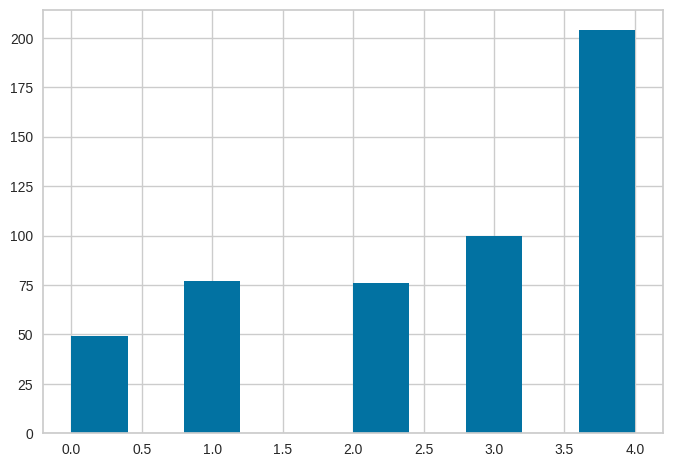

In [24]:
# lets check the X_train_transformed to see effect of params passed
get_config('X_train_transformed')['age'].hist()

<Axes: >

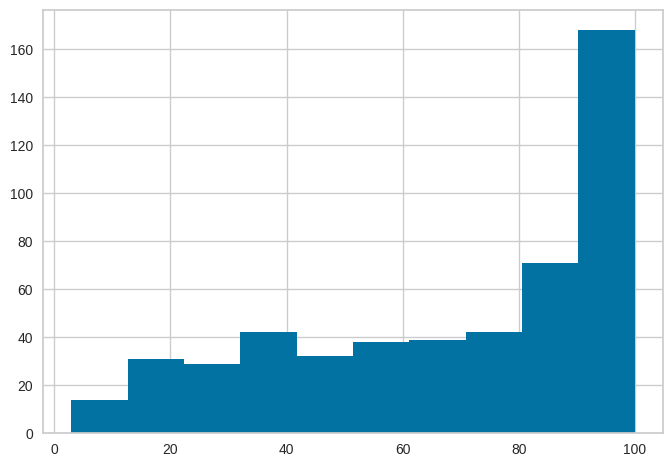

In [26]:
get_config('X_train')['age'].hist()

**Create Model** : *This function trains an unsupervised anomaly detection model. All the available models can be accessed using the models function.*

In [27]:
# check all the available models
models()

,Name,Reference
ID,,
abod,Angle-base Outlier Detection,pyod.models.abod.ABOD
cluster,Clustering-Based Local Outlier,pycaret.internal.patches.pyod.CBLOFForceToDouble
cof,Connectivity-Based Local Outlier,pyod.models.cof.COF
iforest,Isolation Forest,pyod.models.iforest.IForest
histogram,Histogram-based Outlier Detection,pyod.models.hbos.HBOS
knn,K-Nearest Neighbors Detector,pyod.models.knn.KNN
lof,Local Outlier Factor,pyod.models.lof.LOF
svm,One-class SVM detector,pyod.models.ocsvm.OCSVM
pca,Principal Component Analysis,pyod.models.pca.PCA


In [28]:
# train iforest model
iforest = create_model('iforest')

Processing:   0%|          | 0/3 [00:00<?, ?it/s]

In [29]:
iforest

IForest(behaviour='new', bootstrap=False, contamination=0.05,
    max_features=1.0, max_samples='auto', n_estimators=100, n_jobs=-1,
    random_state=123, verbose=0)

In [30]:
# train iforest with specific model parameter
create_model('iforest', contamination = 0.1)

Processing:   0%|          | 0/3 [00:00<?, ?it/s]

IForest(behaviour='new', bootstrap=False, contamination=0.05,
    max_features=1.0, max_samples='auto', n_estimators=100, n_jobs=-1,
    random_state=123, verbose=0)

**Assign Model**: *This function assigns anomaly labels to the dataset for a given model. (1 = outlier, 0 = inlier)*.

In [32]:
iforest_results = assign_model(iforest)
iforest_results

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv,Anomaly,Anomaly_Score
0,0.00632,18.0,2.31,0,0.538,6.575,65.199997,4.0900,1,296,15.300000,396.899994,4.98,24.000000,0,-0.113161
1,0.02731,0.0,7.07,0,0.469,6.421,78.900002,4.9671,2,242,17.799999,396.899994,9.14,21.600000,0,-0.148230
2,0.02729,0.0,7.07,0,0.469,7.185,61.099998,4.9671,2,242,17.799999,392.829987,4.03,34.700001,0,-0.107167
3,0.03237,0.0,2.18,0,0.458,6.998,45.799999,6.0622,3,222,18.700001,394.630005,2.94,33.400002,0,-0.108882
4,0.06905,0.0,2.18,0,0.458,7.147,54.200001,6.0622,3,222,18.700001,396.899994,5.33,36.200001,0,-0.110274
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0,0.573,6.593,69.099998,2.4786,1,273,21.000000,391.989990,9.67,22.400000,0,-0.129265
502,0.04527,0.0,11.93,0,0.573,6.120,76.699997,2.2875,1,273,21.000000,396.899994,9.08,20.600000,0,-0.125397
503,0.06076,0.0,11.93,0,0.573,6.976,91.000000,2.1675,1,273,21.000000,396.899994,5.64,23.900000,0,-0.083964
504,0.10959,0.0,11.93,0,0.573,6.794,89.300003,2.3889,1,273,21.000000,393.450012,6.48,22.000000,0,-0.103029


**Plot Model**

In [31]:
# tsne plot of anomalies
plot_model(iforest, plot = 'tsne')